## Anscombe's quartet

- Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed.
- Each dataset consists of eleven (x,y) points. 
- They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data when analyzing it, and the effect of outliers and other influential observations on statistical properties. 
- He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."

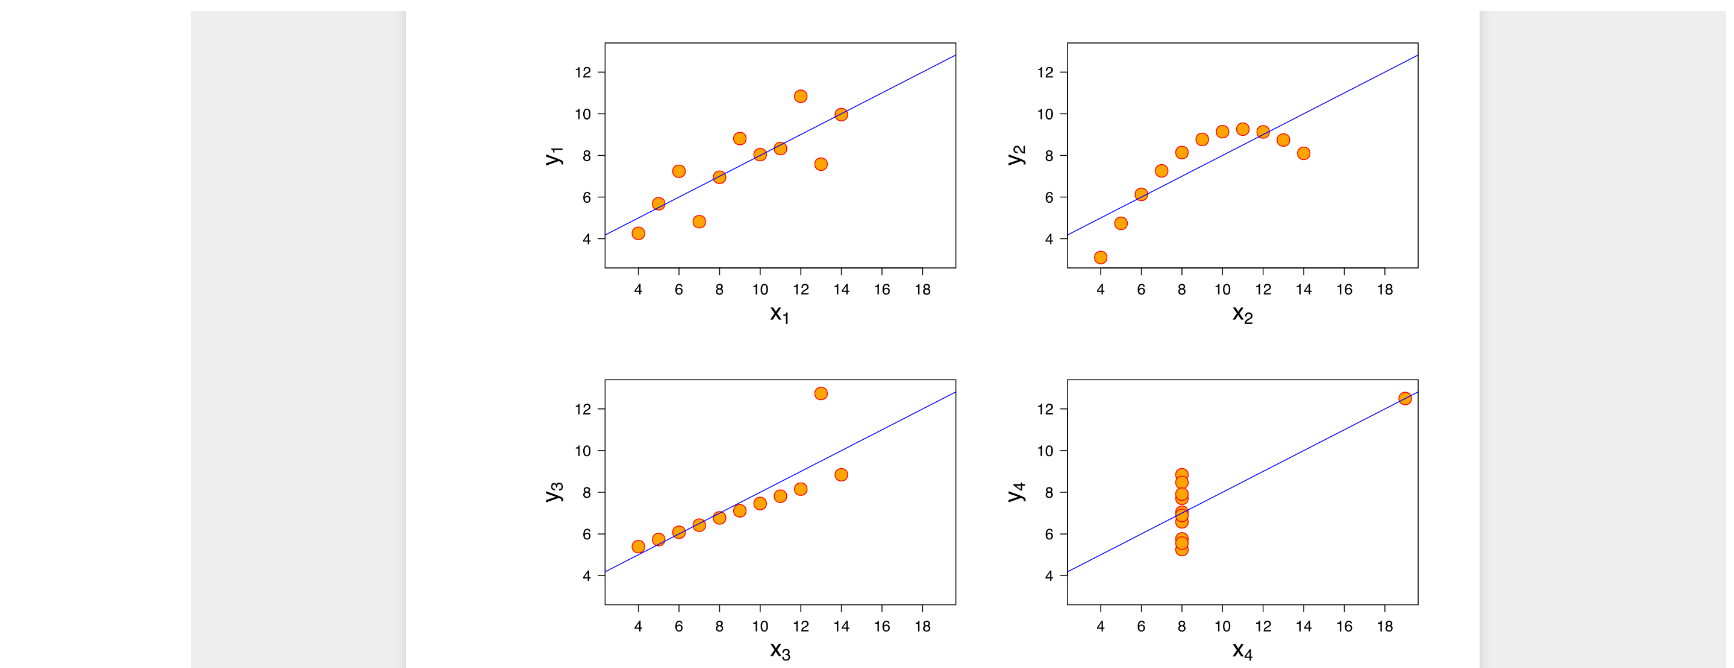
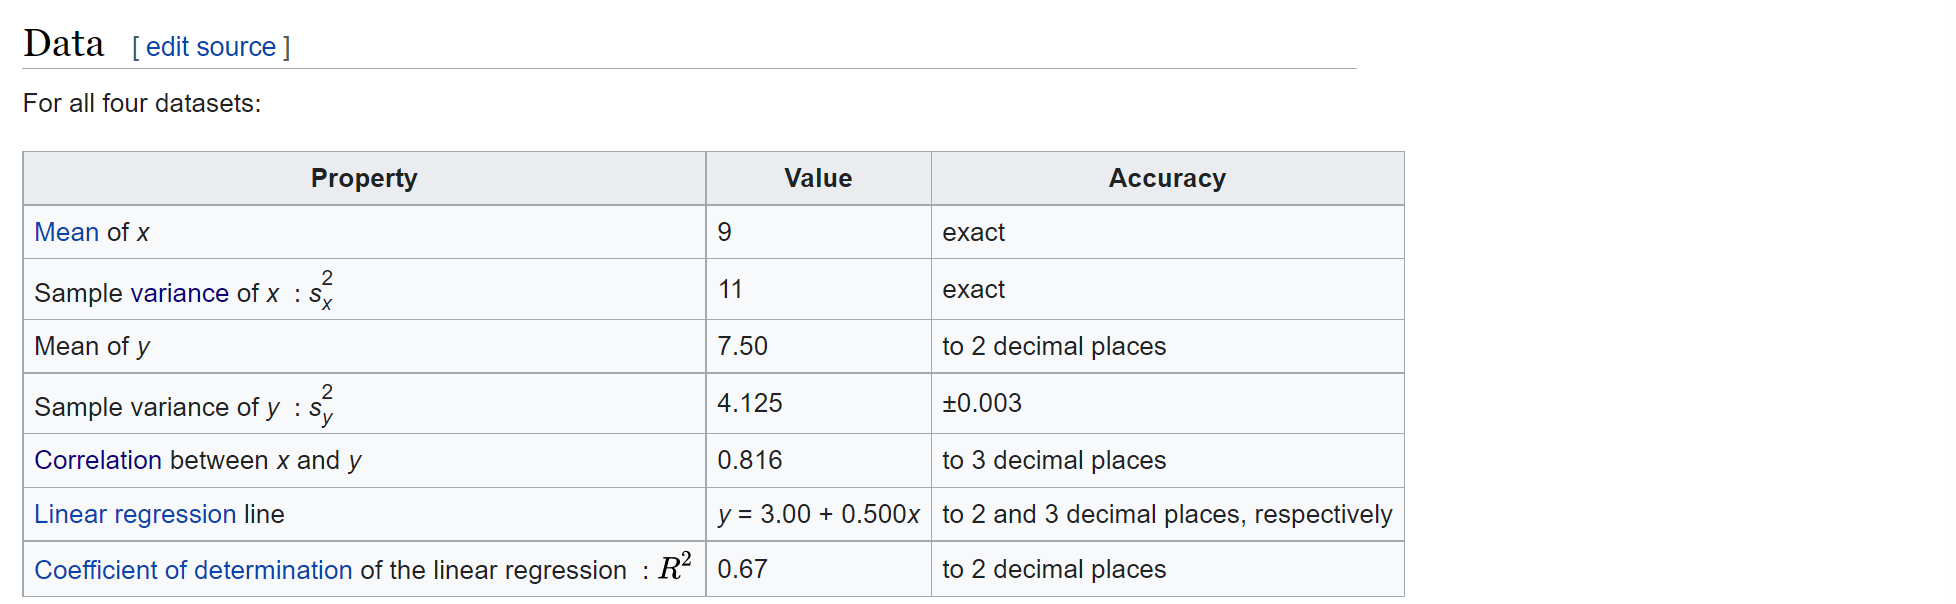

> The first scatter plot (top left) appears to be a simple linear relationship, corresponding to two variables correlated where y could be modelled as gaussian with mean linearly dependent on x.

> The second graph (top right); while a relationship between the two variables is obvious, it is not linear, and the Pearson correlation coefficient is not relevant. A more general regression and the corresponding coefficient of determination would be more appropriate.

> In the third graph (bottom left), the modelled relationship is linear, but should have a different regression line (a robust regression would have been called for). The calculated regression is offset by the one outlier which exerts enough influence to lower the correlation coefficient from 1 to 0.816.

> the fourth graph (bottom right) shows an example when one high-leverage point is enough to produce a high correlation coefficient, even though the other data points do not indicate any relationship between the variables.

- The quartet is still often used to illustrate the importance of looking at a set of data graphically before starting to analyze according to a particular type of relationship, and the inadequacy of basic statistic properties for describing realistic datasets.

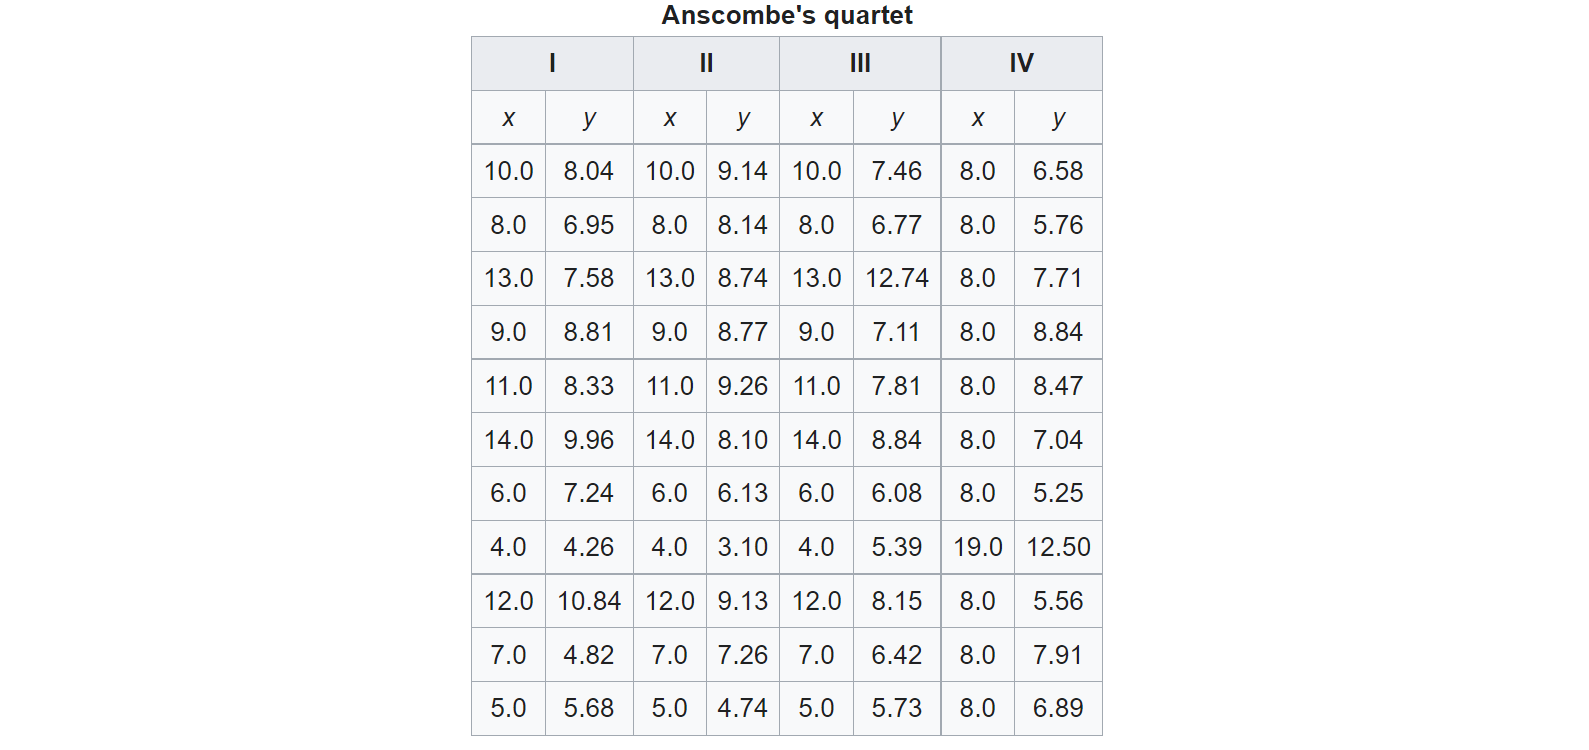

## Task: Determine the eligibility for granting Home loan.

Objective :

1. To understand the patterns in the data.
2. How to Handle the categorical features.
3. How to deal with missing data.
4. Feature Engineering
5. Finding the most important features while taking the decision of granting a loan application.
6. Understanding the Normalization and standardisation of the data.




In [1]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')



In [2]:
# !gdown "1oJbdRpTLqPu1SIBXHkzWRaLaZbvZot7w"

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [5]:
data.shape

(614, 13)

In [6]:
features = data.columns
features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data.sample(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
341,LP002116,Female,No,0,Graduate,No,2378,0.0,46.0,360.0,1.0,Rural,N
147,LP001518,Male,Yes,1,Graduate,No,1538,1425.0,30.0,360.0,1.0,Urban,Y
489,LP002556,Male,No,0,Graduate,No,2435,0.0,75.0,360.0,1.0,Urban,N
78,LP001263,Male,Yes,3+,Graduate,No,3167,4000.0,180.0,300.0,0.0,Semiurban,N
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
556,LP002794,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,NaN,Urban,Y
195,LP001665,Male,Yes,1,Graduate,No,3125,2583.0,170.0,360.0,1.0,Semiurban,N
156,LP001541,Male,Yes,1,Graduate,No,6000,0.0,160.0,360.0,NaN,Rural,Y
269,LP001884,Female,No,1,Graduate,No,2876,1560.0,90.0,360.0,1.0,Urban,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

drop not needed features : 

In [10]:
data.drop("Loan_ID",axis=1,inplace=True)

### EDA

In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
data.describe(include="object")

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


#### Missing Values per Column

In [13]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Correlation Matrix between Features 

In [14]:
data.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


**Categorical Features** 

In [15]:
data.dtypes == "object"

Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area         True
Loan_Status           True
dtype: bool

In [16]:
Features = (data.dtypes == "object")

**Categorical Features**

In [17]:
Categorical_Features = list(Features[Features==True].index)

In [18]:
Categorical_Features.remove("Loan_Status")
Categorical_Features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

##### Numerical Features 

In [19]:
Numerical_Features = list(Features[Features==False].index)

In [20]:
Numerical_Features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

##### Data broken into Categorical and Numerical Features 

In [21]:
data[Categorical_Features].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [22]:
data[Numerical_Features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [23]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#####  Loan Status is  the `Target Variable` (dependent Variable )

#### Loan Stats (Yi) is a binary Variable 

    Y    422
    N    192

##### dataset is imbalanced 

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

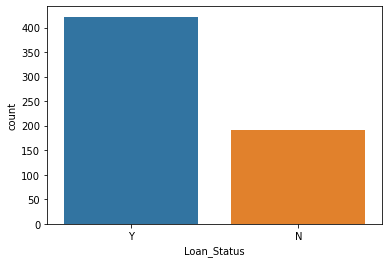

In [24]:
sns.countplot(data=data,x = "Loan_Status")

### If we want to see , the dependency of gender on loan being approved or not! 

- ### Analysing Gender

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

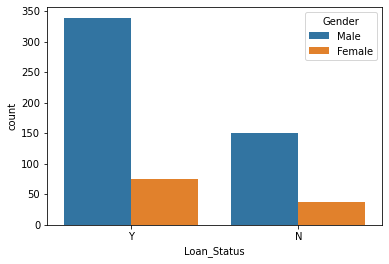

In [25]:
sns.countplot(data=data,x = "Loan_Status",hue="Gender")

1. we can perform chi square test
2. Conditional probabilities 

In [26]:
pd.crosstab(columns= data["Gender"],
            index = data["Loan_Status"],margins=True)

Gender,Female,Male,All
Loan_Status,,,
N,37,150,187
Y,75,339,414
All,112,489,601


    USING CONDITIONAL PROBABILITY 

In [27]:
pd.crosstab(columns= data["Gender"],
            index = data["Loan_Status"],margins=True,normalize="columns")*100

Gender,Female,Male,All
Loan_Status,,,
N,33.035714,30.674847,31.114809
Y,66.964286,69.325153,68.885191


In [28]:
pd.crosstab(columns= data["Gender"],
            index = data["Loan_Status"])

Gender,Female,Male
Loan_Status,,
N,37,150
Y,75,339


####  Performing Chi-Square test of Independence to check if Gender and Loan Approval are independent 

    H0 : the variables are independent, there is no relationship between the two categorical variables

In [29]:
stats.chi2_contingency(pd.crosstab(columns= data["Gender"],
            index = data["Loan_Status"]))

<IPython.core.display.Javascript object>

(0.13962612116543877,
 0.7086529816451106,
 1,
 array([[ 34.84858569, 152.15141431],
        [ 77.15141431, 336.84858569]]))

In [30]:
chi2_critical = stats.chi2.ppf(0.95,1)
significances_Level = 0.05

<IPython.core.display.Javascript object>

In [31]:
chi2_critical,significances_Level

(3.841458820694124, 0.05)

In [32]:
Chi2_statistic = 0.13962612116543877
p_value = 0.7086529816451106

In [33]:
Chi2_statistic > chi2_critical

False

In [34]:
p_value > significances_Level

True

    Failed to reject null Hypothesis ! 
    Gender and Loan Approval are Independent Variables. 
    
    Being Male or Female doent not matter , if Loan gets apporved or not ! 
    That means there is no Gender Bias in our data

- ### Analysing Education : 

In [35]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
data["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Forming Chi-Square test for Independence for Education and Loan APproval if they are dependent features . 

    H0 : the variables are independent, there is no relationship between the two categorical variables

In [37]:
stats.chi2_contingency(pd.crosstab(columns= data["Education"],
            index = data["Loan_Status"]))

<IPython.core.display.Javascript object>

(4.091490413303621,
 0.04309962129357355,
 1,
 array([[150.09771987,  41.90228013],
        [329.90228013,  92.09771987]]))

In [38]:
0.04309962129357355 < 0.05

True

In [39]:
stats.chi2.ppf(0.95,1)

<IPython.core.display.Javascript object>

3.841458820694124

In [40]:
3.841458820694124 > 4.091490413303621

False

    From Chi-Sq test , We p-value is smaller than significant Value , 
    We reject null Hypothesis that features are independent. 
    Hence we can conclude that loan approval and Education level 
    is Dependent. 

### Does the loan granting depends on the education 

    Boxplot of Income as per Educated or not

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

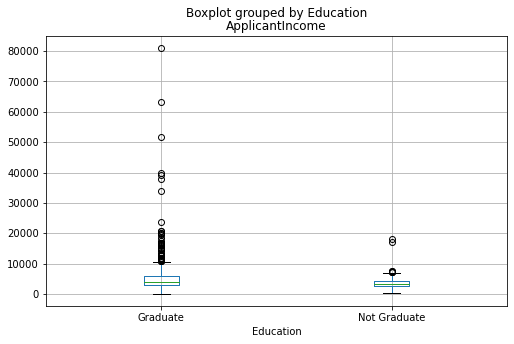

In [41]:
data.boxplot(column="ApplicantIncome",
            by="Education",
            figsize=(8,5))

### Does the loan granting depends on the education 

<AxesSubplot:title={'center':'CoapplicantIncome'}, xlabel='Education'>

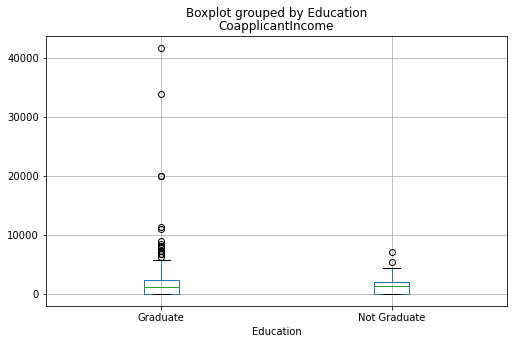

In [42]:
data.boxplot(column="CoapplicantIncome",
            by="Education",
            figsize=(8,5))

### Distribution of Applicant Income

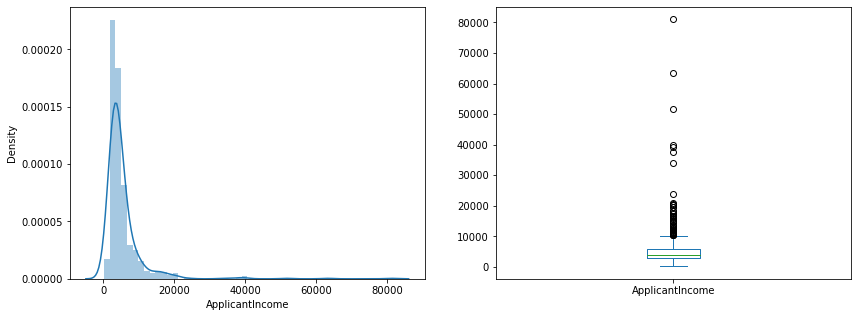

In [43]:
plt.subplot(121)
sns.distplot(data["ApplicantIncome"])

plt.subplot(122)
# sns.boxplot(data["ApplicantIncome"])
data["ApplicantIncome"].plot.box(figsize=(14,5))
plt.show()

### Distribution of Coapplicant Income

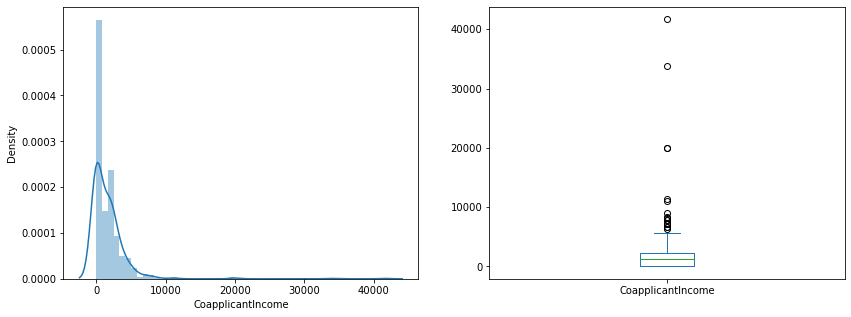

In [44]:
plt.subplot(121)
sns.distplot(data["CoapplicantIncome"])

plt.subplot(122)
# sns.boxplot(data["ApplicantIncome"])
data["CoapplicantIncome"].plot.box(figsize=(14,5))
plt.show()

### Mean/Median differnee between incomes of those who got the loan apprve and those who dint got the loan approved

In [45]:
data.groupby("Loan_Status")["ApplicantIncome"].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [46]:
data.groupby("Loan_Status")["ApplicantIncome"].median()

Loan_Status
N    3833.5
Y    3812.5
Name: ApplicantIncome, dtype: float64

<AxesSubplot:xlabel='Loan_Status'>

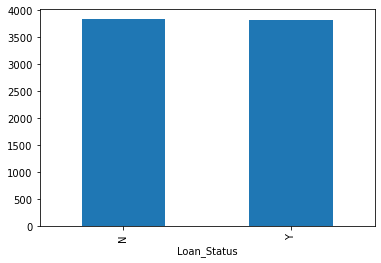

In [47]:
data.groupby("Loan_Status")["ApplicantIncome"].median().plot.bar()

From above information about median and mean applicant income , we can see that there's no significant differnee between incomes of those who got the loan apprve and those who dint got the loan approved .

- ### Feature Engineering :

In [48]:
# feature binning : income 

In [49]:
data["ApplicantIncome"].min(),data["ApplicantIncome"].max()

(150, 81000)

In [50]:
pd.qcut(data["ApplicantIncome"],10)

0      (5185.6, 6252.4]
1      (4343.6, 5185.6]
2      (2605.4, 3050.4]
3      (2216.1, 2605.4]
4      (5185.6, 6252.4]
             ...       
609    (2605.4, 3050.4]
610    (3812.5, 4343.6]
611    (6252.4, 9459.9]
612    (6252.4, 9459.9]
613    (4343.6, 5185.6]
Name: ApplicantIncome, Length: 614, dtype: category
Categories (10, interval[float64, right]): [(149.999, 2216.1] < (2216.1, 2605.4] < (2605.4, 3050.4] < (3050.4, 3406.8] ... (4343.6, 5185.6] < (5185.6, 6252.4] < (6252.4, 9459.9] < (9459.9, 81000.0]]

In [51]:
bins = [0,2500,4000,6000,8000,10000,20000,40000,81000]
groups = ["Low"
         ,"Average",
         "Medium",
         "H1","H2","H3","H4","VeryHigh"]


In [52]:
data["Income_Bin"] = pd.cut(data["ApplicantIncome"],bins,labels=groups)

In [53]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin
443,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y,H4
291,Male,Yes,2,Graduate,No,4400,0.0,127.0,360.0,0.0,Semiurban,N,Medium
413,Male,Yes,0,Not Graduate,No,2253,2033.0,110.0,360.0,1.0,Rural,Y,Low
450,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural,N,Low
408,Male,Yes,1,Graduate,No,8300,0.0,152.0,300.0,0.0,Semiurban,N,H2


In [54]:
pd.crosstab(index=data["Income_Bin"],
           columns=data["Loan_Status"],margins=True,
           normalize="columns")*100


Loan_Status,N,Y,All
Income_Bin,,,
Low,17.708333,17.535545,17.589577
Average,34.895833,37.677725,36.807818
Medium,23.437500,23.222749,23.289902
H1,10.416667,8.056872,8.794788
H2,4.687500,5.213270,5.048860
H3,6.770833,6.398104,6.514658
H4,1.562500,1.421801,1.465798
VeryHigh,0.520833,0.473934,0.488599


    from above conditional probability we can see, that from low to higer income , the difference in getting loan approved or not , is not changing much ! 
    Each income group has equal chance of loan being  approved or rejected .

#### Conditional Probability Plot : 

P [ Loan Approval | Income Category ]

<AxesSubplot:xlabel='Income_Bin'>

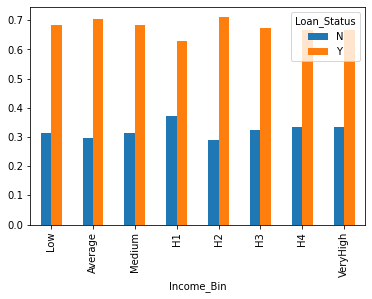

In [55]:
pd.crosstab(index=data["Income_Bin"],
           columns=data["Loan_Status"],
           normalize="index").plot(kind="bar")


<AxesSubplot:xlabel='Income_Bin'>

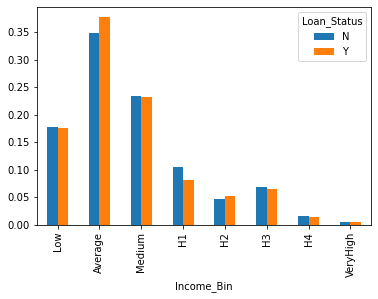

In [56]:
pd.crosstab(index=data["Income_Bin"],
           columns=data["Loan_Status"],
           normalize="columns").plot(kind="bar")


    Education level has no impact on loan approva.

- ##### Coapplicant Income : 

In [57]:
data["CoapplicantIncome"].min(),data["CoapplicantIncome"].max()

(0.0, 41667.0)

In [58]:
bins = [-1,1000,3000,42000]
groups = ["low","Average","High"]

In [59]:
data["CoApplicantIncome_Bin"] = pd.cut(data["CoapplicantIncome"],bins,labels=groups)

In [60]:
pd.crosstab(index = data["CoApplicantIncome_Bin"],
           columns = data["Loan_Status"],normalize="columns")

Loan_Status,N,Y
CoApplicantIncome_Bin,,
low,0.515625,0.464455
Average,0.317708,0.381517
High,0.166667,0.154028


<AxesSubplot:xlabel='CoApplicantIncome_Bin'>

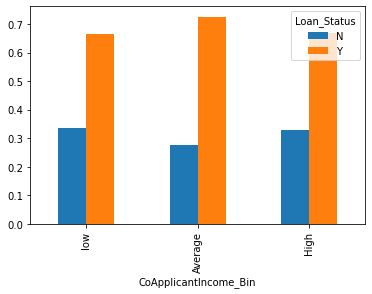

In [61]:
pd.crosstab(index = data["CoApplicantIncome_Bin"],
           columns = data["Loan_Status"],normalize="index").plot(kind="bar")

<AxesSubplot:xlabel='CoApplicantIncome_Bin'>

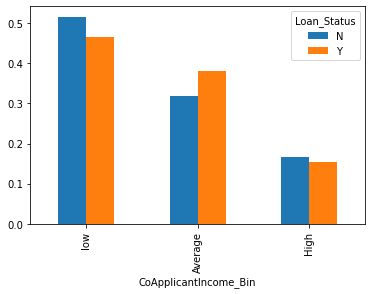

In [62]:
pd.crosstab(index = data["CoApplicantIncome_Bin"],
           columns = data["Loan_Status"],normalize="columns").plot(kind="bar")

In [63]:
data["CoApplicantIncome_Bin"].value_counts(dropna=False)

low        295
Average    222
High        97
Name: CoApplicantIncome_Bin, dtype: int64

    273 people dint provided coapplication information 

In [64]:
data["CoapplicantIncome"].value_counts().head()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
Name: CoapplicantIncome, dtype: int64

- #### New feature : total household income : 

In [65]:
data["TotalIncome"] = data["ApplicantIncome"]+data["CoapplicantIncome"]

In [66]:
data["total_income_bins"] = pd.qcut(data["TotalIncome"],5)

In [67]:
pd.crosstab(index = data["total_income_bins"],
           columns = data["Loan_Status"] ,
           normalize = "index")

Loan_Status,N,Y
total_income_bins,,
"(1441.999, 3812.6]",0.349593,0.650407
"(3812.6, 4807.4]",0.300813,0.699187
"(4807.4, 6042.6]",0.262295,0.737705
"(6042.6, 8334.0]",0.330645,0.669355
"(8334.0, 81000.0]",0.319672,0.680328


<AxesSubplot:xlabel='total_income_bins'>

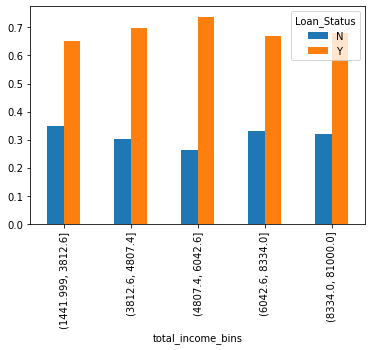

In [68]:
pd.crosstab(index = data["total_income_bins"],
           columns = data["Loan_Status"] ,
           normalize = "index").plot(kind="bar")

<AxesSubplot:xlabel='total_income_bins'>

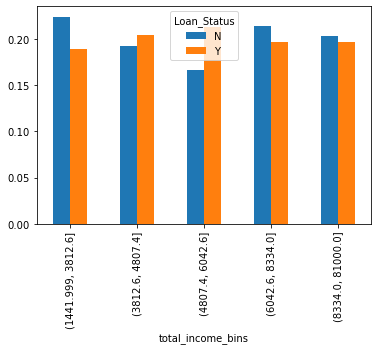

In [69]:
pd.crosstab(index = data["total_income_bins"],
           columns = data["Loan_Status"] ,
           normalize = "columns").plot(kind="bar")

In [70]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["total_income_bins"] = pd.cut(data["TotalIncome"],bins,labels=group)

### Loan Amount and Loan term 

In [71]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_Bin', 'CoApplicantIncome_Bin', 'TotalIncome',
       'total_income_bins'],
      dtype='object')

In [72]:
data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [73]:
30*12

360

In [74]:
data["Loan_Amount_Term"].value_counts(normalize=True)*100

360.0    85.333333
180.0     7.333333
480.0     2.500000
300.0     2.166667
240.0     0.666667
84.0      0.666667
120.0     0.500000
60.0      0.333333
36.0      0.333333
12.0      0.166667
Name: Loan_Amount_Term, dtype: float64

    85% of the people have applied loan for 360 months / 30 year loan duration

In [75]:
data["Loan_Amount_Term"] = (data["Loan_Amount_Term"]/12).astype("float")     # in years

In [76]:
# data["Loan_Amount_Term"].value_counts().plot(kind ="bar")

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

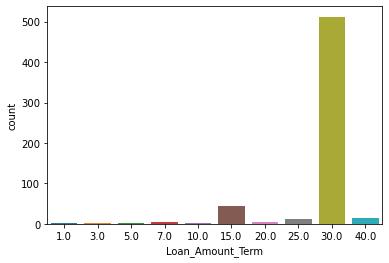

In [77]:
sns.countplot(data = data, 
             x = "Loan_Amount_Term")

In [78]:
data["Loan_Amount_Term"]

0      30.0
1      30.0
2      30.0
3      30.0
4      30.0
       ... 
609    30.0
610    15.0
611    30.0
612    30.0
613    30.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

    # we dont have an interest rate in our data : 

     ignoring interest rate : 

    EMI = loan_amout / loan_amt_term 

- ##### Loan Amount 

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

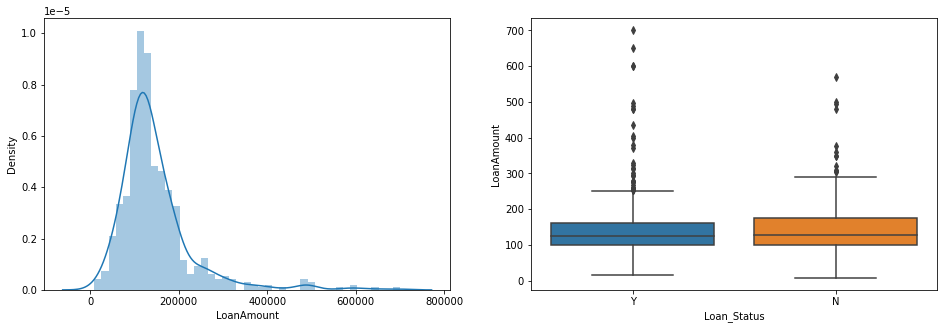

In [79]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.distplot(data["LoanAmount"]*1000)

plt.subplot(122)
sns.boxplot(data=data, 
           y = "LoanAmount",
           x = "Loan_Status")

 #### ignoring interest rate : 

#### EMI = loan_amout / loan_amt_term

In [80]:
data["Loan_amount_to_be_repaid_per_year"]  = data["LoanAmount"] / data["Loan_Amount_Term"]

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_amount_to_be_repaid_per_year'>

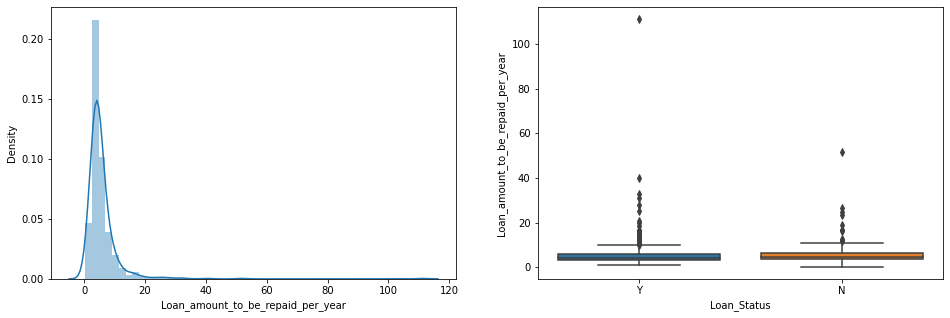

In [81]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.distplot(data["Loan_amount_to_be_repaid_per_year"])

plt.subplot(122)
sns.boxplot(data=data, 
           y = "Loan_amount_to_be_repaid_per_year",
           x = "Loan_Status")

    to analyse the boxplot properly , transforming data to log: 

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_amount_to_be_repaid_per_year'>

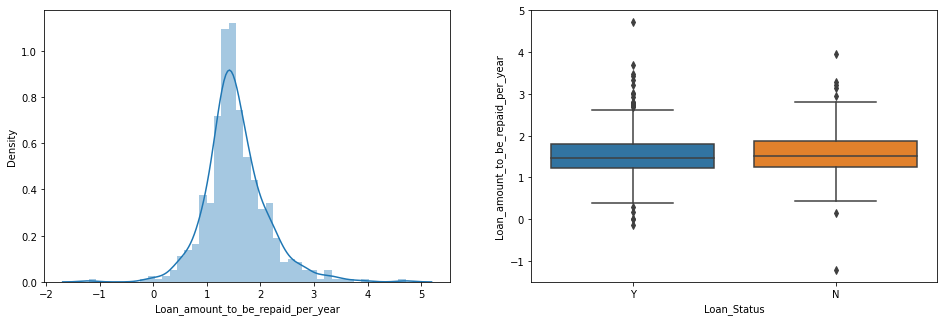

In [82]:
log_loan_amt = np.log(data["Loan_amount_to_be_repaid_per_year"])
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.distplot(log_loan_amt)

plt.subplot(122)
sns.boxplot(data=data, 
           y = log_loan_amt,
           x = "Loan_Status")

In [83]:
 # not verymuch helpful 

   ### Calculating Loan repaying capacity based on income and loan maount to be repaid 

In [84]:
(data["Loan_amount_to_be_repaid_per_year"]*1000)/12

0             NaN
1      355.555556
2      183.333333
3      333.333333
4      391.666667
          ...    
609    197.222222
610    222.222222
611    702.777778
612    519.444444
613    369.444444
Name: Loan_amount_to_be_repaid_per_year, Length: 614, dtype: float64

In [85]:
data["TotalIncome"]*0.1

0      584.9
1      609.1
2      300.0
3      494.1
4      600.0
       ...  
609    290.0
610    410.6
611    831.2
612    758.3
613    458.3
Name: TotalIncome, Length: 614, dtype: float64

- ### Calculating Monthy EMI : on the amount of loan per year 

In [86]:
data["EMI"] = (data["Loan_amount_to_be_repaid_per_year"]*1000)/12

In [87]:
data["Able_to_pay_EMI"]  = (data["TotalIncome"]*0.1 > data["EMI"])

In [88]:
data["Able_to_pay_EMI"]

0      False
1       True
2       True
3       True
4       True
       ...  
609     True
610     True
611     True
612     True
613     True
Name: Able_to_pay_EMI, Length: 614, dtype: bool

In [89]:
data["Able_to_pay_EMI"] = data["Able_to_pay_EMI"].astype("int")

In [90]:
data["Able_to_pay_EMI"]

0      0
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Name: Able_to_pay_EMI, Length: 614, dtype: int32

  #### created a binary feature : 
   #### if applicant's 10% of the income is greater than EMI amount , it classifies as True(1)

<AxesSubplot:xlabel='Able_to_pay_EMI', ylabel='count'>

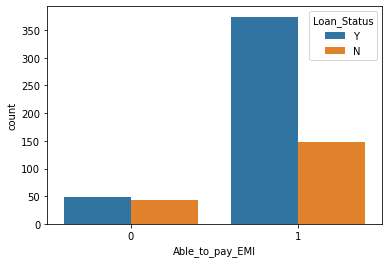

In [91]:
sns.countplot(x = "Able_to_pay_EMI",
             data=  data,
             hue= "Loan_Status")

In [92]:
pd.crosstab(index = data["Loan_Status"],
           columns= data["Able_to_pay_EMI"])

Able_to_pay_EMI,0,1
Loan_Status,,
N,44,148
Y,48,374


In [93]:
stats.chi2_contingency(pd.crosstab(index = data["Loan_Status"],
           columns= data["Able_to_pay_EMI"]))

<IPython.core.display.Javascript object>

(12.909621328812785,
 0.0003268974206671655,
 1,
 array([[ 28.76872964, 163.23127036],
        [ 63.23127036, 358.76872964]]))

In [94]:
stats.chi2.ppf(0.95,1)

<IPython.core.display.Javascript object>

3.841458820694124

In [95]:
1-stats.chi2.cdf(12.9096,1)

<IPython.core.display.Javascript object>

0.0003269011457319726

 ##### loan approval depends on Ability to pay emi

In [96]:
pd.crosstab(index = data["Loan_Status"],
           columns= data["Able_to_pay_EMI"],
           normalize="columns")*100

Able_to_pay_EMI,0,1
Loan_Status,,
N,47.826087,28.35249
Y,52.173913,71.64751


<AxesSubplot:xlabel='Loan_Status'>

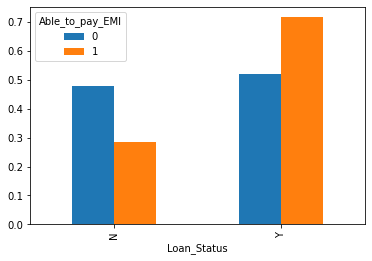

In [97]:
pd.crosstab(index = data["Loan_Status"],
           columns= data["Able_to_pay_EMI"],
           normalize="columns").plot(kind = "bar")

### Dependents and Loan **approval**

In [98]:
data['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [99]:
data['Dependents'].replace('3+',3,inplace=True)
data['Dependents'] = data['Dependents'].astype('float')


<AxesSubplot:xlabel='Dependents', ylabel='count'>

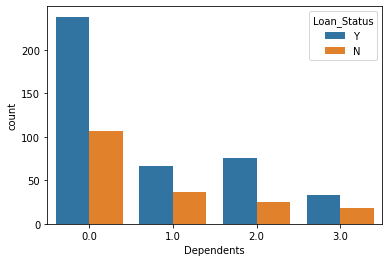

In [100]:
sns.countplot(data =data, x = 'Dependents', hue = 'Loan_Status')

#Observations:

## No Dependents and 2 dependents will helps you get loan easily.

### Credit History vs Loan Approval

In [101]:
# do you have a credit score or not ! 

In [102]:
data['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

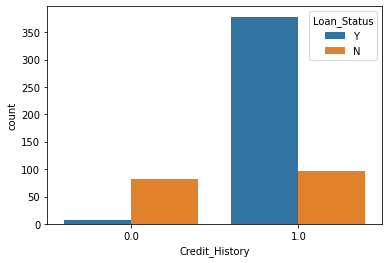

In [103]:
sns.countplot(data =data, x = 'Credit_History', hue = 'Loan_Status')
#Observation:
## We can clearly see that the approval rate is 80% if your credit history is aligned with the guidlines.
## Hence this is the most important question that can be considered.

In [104]:
pd.crosstab(index=data["Loan_Status"],
           columns=data["Credit_History"])

Credit_History,0.0,1.0
Loan_Status,,
N,82,97
Y,7,378


<AxesSubplot:xlabel='Loan_Status'>

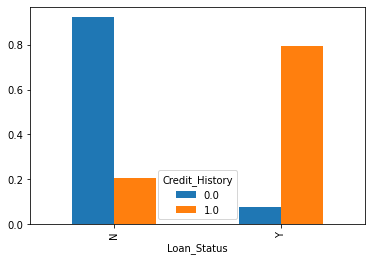

In [105]:
pd.crosstab(index=data["Loan_Status"],
           columns=data["Credit_History"],normalize="columns").plot(kind="bar")

## Handling Missing Imputation  : 

In [106]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,CoApplicantIncome_Bin,TotalIncome,total_income_bins,Loan_amount_to_be_repaid_per_year,EMI,Able_to_pay_EMI
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,low,5849.0,High,NaN,NaN,0
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,Average,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,low,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,low,6000.0,High,4.700000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,Average,low,2900.0,Low,2.366667,197.222222,1
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,Medium,low,4106.0,Average,2.666667,222.222222,1
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,H2,low,8312.0,Very High,8.433333,702.777778,1
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,H1,low,7583.0,High,6.233333,519.444444,1


In [107]:
data.isna().sum()

Gender                               13
Married                               3
Dependents                           15
Education                             0
Self_Employed                        32
ApplicantIncome                       0
CoapplicantIncome                     0
LoanAmount                           22
Loan_Amount_Term                     14
Credit_History                       50
Property_Area                         0
Loan_Status                           0
Income_Bin                            0
CoApplicantIncome_Bin                 0
TotalIncome                           0
total_income_bins                     0
Loan_amount_to_be_repaid_per_year    36
EMI                                  36
Able_to_pay_EMI                       0
dtype: int64

## Imputation (statistics)

- imputation is the process of replacing missing data with substituted values. 


- When substituting for a data point, it is known as "unit imputation"; when substituting for a component of a data point, it is known as "item imputation". 


- There are three main problems that missing data causes: missing data can introduce a substantial amount of bias, make the handling and analysis of the data more arduous, and create reductions in efficiency.


- Because missing data can create problems for analyzing data, imputation is seen as a way to avoid pitfalls involved with listwise deletion of cases that have missing values.
- That is to say, when one or more values are missing for a case, most statistical packages default to discarding any case that has a missing value, which may introduce bias or affect the representativeness of the results. 


- Imputation preserves all cases by replacing missing data with an estimated value based on other available information.
- Once all missing values have been imputed, the data set can then be analysed using standard techniques for complete data.
- There have been many theories embraced by scientists to account for missing data but the majority of them introduce bias. A few of the well known attempts to deal with missing data include: 
>        
        hot deck 
        cold deck imputation
        mean imputation
        non-negative matrix factorization
        regression imputation
        last observation carried forward
        stochastic imputation
        multiple imputation.

### Imputation Methods
- An imputation process of a data set can be broken down into the following three phases (Generic Statistical Data Editing Models: GSDEMs 2015):



> Review, whereby data is examined for potential problems; identifying instances of missingness and erroneous values

> Select, whereby data is identified for further treatment. Of the potential problems identified in the review phase, a method is applied to determine which of these erroneous or missing cases need to be treated

> Treat, whereby changes are applied to the data identified in the select phase by either correcting errors/ filling in missing values


- The focus of this project was in applying Machine Learning methods to treat values in a data set. That is, it was of interest to compare existing approaches, of treating missing or erroneous values by estimating replacement figures, to machine learning methods. Methods of variable treatment can be grouped into one of the following categories:

        - interactive treatment
        - deductive imputation
        - model based imputation
        - donor based imputation

The mechanisms for a given imputation method could be deterministic or stochastic. The former refers to instances where repeated trials of the same method yield identical output. Whereas the latter refers to instances where there is element of randomness; repeated iterations will produce different results.


### `2.2.1 Interactive treatment`

- Interactive treatment refers to a class of methods whereby the `data are adjusted by a human editor by either re-contacting the respondent/ data provider`, replacing values from another variable/ data source, or creating a value based on subject matter expertise.



### `2.2.2 Deductive imputation`

- Deductive imputation uses logic or an understanding about the relationship between variables and units to fill in missing values. 
- Examples include deriving a value as a function of other values, adopting a value from a related unit, and adopting a value from an earlier time point. Generally, this method is `used when the true value can be derived with certainty or with a very high probability.`



### `2.2.3 Model based imputation`

- Model based imputation refers to a class of methods that estimate missing values using assumptions about the distribution of the data, which include mean and median imputation. Or `assumptions about the relationship between auxiliary variables (or x variables) and the target y variable to predict missing values`.


### `2.2.4 Donor based imputation`

- Donor based imputation `adopt values from an observed unit, which are then used for the missing unit`. For each recipient with a missing value for variable y, a donor is identified that is similar to the recipient with respect to certain background characteristics (often `referred to as matching variables`) that are related to the target variable y. 
- Such methods are relatively easy to apply when there are several related missing values in one record, and if the intention is to preserve the relationship between variables.

In [108]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Bin,CoApplicantIncome_Bin,TotalIncome,total_income_bins,Loan_amount_to_be_repaid_per_year,EMI,Able_to_pay_EMI
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,low,5849.0,High,NaN,NaN,0
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,Average,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,low,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,low,6000.0,High,4.700000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,Average,low,2900.0,Low,2.366667,197.222222,1
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,Medium,low,4106.0,Average,2.666667,222.222222,1
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,H2,low,8312.0,Very High,8.433333,702.777778,1
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,H1,low,7583.0,High,6.233333,519.444444,1


In [109]:
# number of missing values per columns

In [110]:
data.isnull().sum().sort_values(ascending=False)

Credit_History                       50
EMI                                  36
Loan_amount_to_be_repaid_per_year    36
Self_Employed                        32
LoanAmount                           22
Dependents                           15
Loan_Amount_Term                     14
Gender                               13
Married                               3
CoapplicantIncome                     0
Property_Area                         0
Loan_Status                           0
Income_Bin                            0
CoApplicantIncome_Bin                 0
TotalIncome                           0
total_income_bins                     0
ApplicantIncome                       0
Education                             0
Able_to_pay_EMI                       0
dtype: int64

In [111]:
data.shape

(614, 19)

In [112]:
# number of total count including total number per coluumn

In [113]:
(data.isnull().sum()/len(data))*100

Gender                               2.117264
Married                              0.488599
Dependents                           2.442997
Education                            0.000000
Self_Employed                        5.211726
ApplicantIncome                      0.000000
CoapplicantIncome                    0.000000
LoanAmount                           3.583062
Loan_Amount_Term                     2.280130
Credit_History                       8.143322
Property_Area                        0.000000
Loan_Status                          0.000000
Income_Bin                           0.000000
CoApplicantIncome_Bin                0.000000
TotalIncome                          0.000000
total_income_bins                    0.000000
Loan_amount_to_be_repaid_per_year    5.863192
EMI                                  5.863192
Able_to_pay_EMI                      0.000000
dtype: float64

In [114]:
def missing_df(data):
    total_missing_df = data.isna().sum().sort_values(ascending = False)
    percentage_missing_df = ((data.isna().sum()/len(data)*100)).sort_values(ascending = False)
    missingDF = pd.concat([total_missing_df, percentage_missing_df],axis = 1, keys=['Total', 'Percent'])
    return missingDF
    

In [115]:
missing_data = missing_df(data)

In [116]:
missing_data

,Total,Percent
Credit_History,50,8.143322
EMI,36,5.863192
Loan_amount_to_be_repaid_per_year,36,5.863192
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
CoapplicantIncome,0,0.000000


In [117]:
missing_data[missing_data["Total"]>0]

,Total,Percent
Credit_History,50,8.143322
EMI,36,5.863192
Loan_amount_to_be_repaid_per_year,36,5.863192
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599


In [118]:
# Credit history is missing for 8% of data 


In [119]:
data["Credit_History"].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

In [120]:
data["Credit_History"] = data["Credit_History"].fillna(2)

In [121]:
data["Credit_History"].value_counts(dropna=False)

1.0    475
0.0     89
2.0     50
Name: Credit_History, dtype: int64

In [122]:
data["Self_Employed"].value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [123]:
data["Self_Employed"] = data["Self_Employed"].fillna("Other")

In [124]:
data["Self_Employed"].value_counts(dropna=False)

No       500
Yes       82
Other     32
Name: Self_Employed, dtype: int64

### Median Imputation for Numerical Columns :

In [125]:
missing_data.index

Index(['Credit_History', 'EMI', 'Loan_amount_to_be_repaid_per_year',
       'Self_Employed', 'LoanAmount', 'Dependents', 'Loan_Amount_Term',
       'Gender', 'Married', 'CoapplicantIncome', 'Property_Area',
       'Loan_Status', 'Income_Bin', 'CoApplicantIncome_Bin', 'TotalIncome',
       'total_income_bins', 'ApplicantIncome', 'Education', 'Able_to_pay_EMI'],
      dtype='object')

In [126]:
from sklearn.impute import SimpleImputer

In [127]:
num_missing = ['EMI', 'Loan_amount_to_be_repaid_per_year','LoanAmount','Loan_Amount_Term']

median_imputer = SimpleImputer(strategy= "median")

In [128]:
for i in num_missing:
    data[i] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[i])))
    

### Highest Frequecny  Imputation for some categorical Columns :

In [129]:
 categorical_minssing = ['Gender', 'Married','Dependents']

In [130]:
freq_imputer = SimpleImputer(strategy= "most_frequent")

In [131]:
for i in categorical_minssing:
    data[i] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[i])))

In [132]:
# checking if any missing values left : 

In [133]:
missing_df(data)

,Total,Percent
Gender,0,0.0
Property_Area,0,0.0
EMI,0,0.0
Loan_amount_to_be_repaid_per_year,0,0.0
total_income_bins,0,0.0
TotalIncome,0,0.0
CoApplicantIncome_Bin,0,0.0
Income_Bin,0,0.0
Loan_Status,0,0.0
Credit_History,0,0.0


*****
*****
## Categorical to Numerical encoding

Nominal vs Ordinal variables

1. One Hot Encoding
2. Label encoding
3. Target Encoding

Appropriate encoding depends on what our task is (and) what we do next?

#### Task: Compute Correlation (PCC and SRCC) between each feature and the Loan-Status

*****
# Converting Categorical to Numerical : 

# What is Response/Target Coding?

- It is a technique to represent the categorical data while solving a machine learning classification problem. As part of this technique, we represent the probability of the data point belonging to a particular class given a category.  - So for a K-class classification problem, we get K new features which embed the probability of the datapoint belonging to each class based on the value of categorical data. Mathematically speaking, we calculate —


P(class=X | category=A) = P(category=A ∩ class=X) / P(category=A)

## Response coding / target encoding / probabilstic encoding 

In [134]:
pd.crosstab(columns= data["Gender"],
           index=data["Loan_Status"],
            normalize="columns"
         )

Gender,Female,Male
Loan_Status,,
N,0.330357,0.308765
Y,0.669643,0.691235


    M  P[loan approval | male]   = 0.308
    F  P[loan approval | female] = 0.6912


In [135]:
tempdata = pd.read_csv("train.csv")

In [136]:
tempdata["Gender"].value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [137]:
tempdata["Gender"] = tempdata["Gender"].fillna("Others")

In [138]:
tempdata["Gender"].value_counts(dropna=False)

Male      489
Female    112
Others     13
Name: Gender, dtype: int64

In [139]:
pd.crosstab(columns= tempdata["Gender"],
           index=tempdata["Loan_Status"],
            normalize="columns"
         )

Gender,Female,Male,Others
Loan_Status,,,
N,0.330357,0.306748,0.384615
Y,0.669643,0.693252,0.615385



    M  P[loan approval yes | male]   = 0.6932
    F  P[loan approval yes | female] = 0.6696
    O  P[loan approval yes | others] = 0.6153


In [140]:
tempdata["Gender"].replace({"Male":0.6932,
                           "Female":0.6696,
                           "Others":0.6153})

0      0.6932
1      0.6932
2      0.6932
3      0.6932
4      0.6932
        ...  
609    0.6696
610    0.6932
611    0.6932
612    0.6932
613    0.6696
Name: Gender, Length: 614, dtype: float64

In [141]:
# data["Self_Employed"].value_counts()

# One-hot Encoding : 

- In digital circuits and machine learning, a one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0).
- A similar implementation in which all bits are '1' except one '0' is sometimes called one-cold.
- `In statistics, dummy variables represent a similar technique for representing categorical data.`

- `In machine learning, one-hot encoding is a frequently used method to deal with categorical data. `
- Because many machine learning models need their input variables to be numeric, categorical variables need to be transformed in the pre-processing part. 

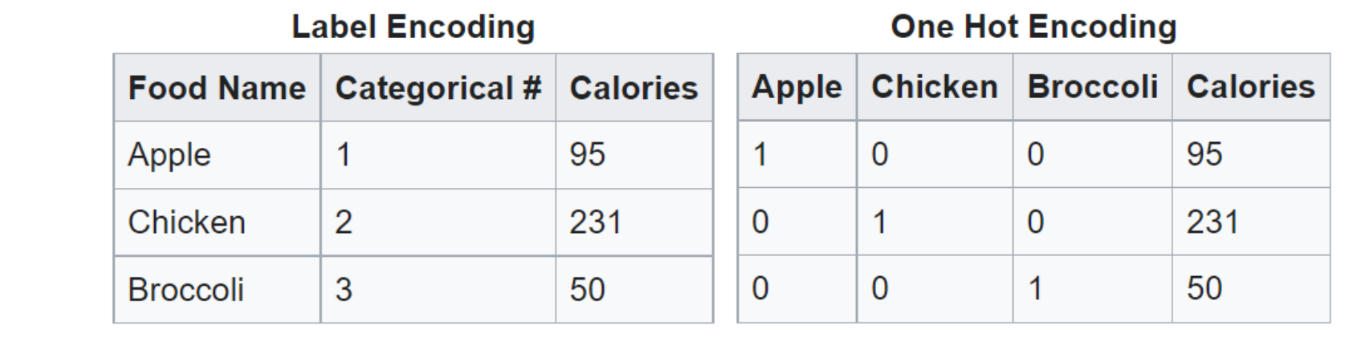

- Categorical data can be either nominal or ordinal.

- Ordinal data has a ranked order for its values and can therefore be converted to numerical data through ordinal encoding.
- An example of ordinal data would be the ratings on a test ranging from A to F, which could be ranked using numbers from 6 to 1. 


- `Since there is no quantitative relationship between nominal variables' individual values, using ordinal encoding can potentially create a fictional ordinal relationship in the data.`
- `Therefore, one-hot encoding is often applied to nominal variables, in order to improve the performance of the algorithm.`



- For each unique value in the original categorical column, a new column is created in this method. These dummy variables are then filled up with zeros and ones (1 meaning TRUE, 0 meaning FALSE).


- Because this process creates multiple new variables, it is prone to creating a big p problem (too many predictors) if there are many unique values in the original column.
- Another downside of one-hot encoding is that it causes multicollinearity between the individual variables, which potentially reduces the model's accuracy.


- Also, if the categorical variable is an output variable, you may want to convert the values back into a categorical form in order to present them in your application.


- In practical usage this transformation is often directly performed by a function that takes categorical data as an input and outputs the corresponding dummy variables. An example would be the dummyVars function of the Caret library in R.

In [142]:
s = data.dtypes == "object"

In [143]:
object_columns = list(s[s].index)
object_columns

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

> ####  Label encodig on data["Loan_Status"]

In [144]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

data["Loan_Status"] = LabelEncoder.fit_transform(data["Loan_Status"])

In [145]:
data["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [146]:
data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

> ### Target Encoding data["Property_Area"]

In [147]:
# !pip install category_encoders

> whenever there;s a categorical variable having more than two cateogirs , it is good to use target encoding 

In [148]:
from category_encoders import TargetEncoder

In [149]:
TEncoder = TargetEncoder()


In [150]:
pd.crosstab(index = data["Loan_Status"],
           columns=data["Property_Area"],
                normalize="columns")

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
0,0.385475,0.23176,0.341584
1,0.614525,0.76824,0.658416


In [151]:
TEncoder.fit_transform(data["Property_Area"],data["Loan_Status"]).value_counts()

Property_Area
0.768240         233
0.658416         202
0.614525         179
dtype: int64

In [152]:
data["Property_Area"] = TEncoder.fit_transform(data["Property_Area"],data["Loan_Status"])

In [153]:
data["Property_Area"].value_counts()

0.768240    233
0.658416    202
0.614525    179
Name: Property_Area, dtype: int64

> ### Education 

In [154]:
data["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [155]:
data["Education"] = LabelEncoder.fit_transform(data["Education"])

In [156]:
data["Education"].value_counts()

0    480
1    134
Name: Education, dtype: int64

> ### Self Employed

In [157]:
data["Self_Employed"].value_counts()

No       500
Yes       82
Other     32
Name: Self_Employed, dtype: int64

In [158]:
data["Self_Employed"] = TEncoder.fit_transform(data["Self_Employed"],data["Loan_Status"])

In [159]:
data["Self_Employed"].value_counts()

0.686000    500
0.682927     82
0.718750     32
Name: Self_Employed, dtype: int64

> ### Married 

In [160]:
col='Married'
data[col] = LabelEncoder.fit_transform(data[col])
data[col].value_counts()

1    401
0    213
Name: Married, dtype: int64

> ### Gender 

In [161]:

col='Gender'
data[col] = LabelEncoder.fit_transform(data[col])

In [162]:
data[col].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             614 non-null    int32   
 1   Married                            614 non-null    int32   
 2   Dependents                         614 non-null    float64 
 3   Education                          614 non-null    int32   
 4   Self_Employed                      614 non-null    float64 
 5   ApplicantIncome                    614 non-null    int64   
 6   CoapplicantIncome                  614 non-null    float64 
 7   LoanAmount                         614 non-null    float64 
 8   Loan_Amount_Term                   614 non-null    float64 
 9   Credit_History                     614 non-null    float64 
 10  Property_Area                      614 non-null    float64 
 11  Loan_Status                        614 non-nu

In [164]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_Bin', 'CoApplicantIncome_Bin', 'TotalIncome',
       'total_income_bins', 'Loan_amount_to_be_repaid_per_year', 'EMI',
       'Able_to_pay_EMI'],
      dtype='object')

In [165]:
model_ready_data = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
      'TotalIncome', 'Loan_amount_to_be_repaid_per_year', 'EMI',
       'Able_to_pay_EMI']]

In [166]:
model_ready_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_amount_to_be_repaid_per_year,EMI,Able_to_pay_EMI
0,1,0,0.0,0,0.686000,5849,0.0,128.0,30.0,1.0,0.658416,1,5849.0,4.383333,365.277778,0
1,1,1,1.0,0,0.686000,4583,1508.0,128.0,30.0,1.0,0.614525,0,6091.0,4.266667,355.555556,1
2,1,1,0.0,0,0.682927,3000,0.0,66.0,30.0,1.0,0.658416,1,3000.0,2.200000,183.333333,1
3,1,1,0.0,1,0.686000,2583,2358.0,120.0,30.0,1.0,0.658416,1,4941.0,4.000000,333.333333,1
4,1,0,0.0,0,0.686000,6000,0.0,141.0,30.0,1.0,0.658416,1,6000.0,4.700000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0.686000,2900,0.0,71.0,30.0,1.0,0.614525,1,2900.0,2.366667,197.222222,1
610,1,1,3.0,0,0.686000,4106,0.0,40.0,15.0,1.0,0.614525,1,4106.0,2.666667,222.222222,1
611,1,1,1.0,0,0.686000,8072,240.0,253.0,30.0,1.0,0.658416,1,8312.0,8.433333,702.777778,1
612,1,1,2.0,0,0.686000,7583,0.0,187.0,30.0,1.0,0.658416,1,7583.0,6.233333,519.444444,1


# Correlation 

In [167]:
model_ready_data.corr(method="pearson")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_amount_to_be_repaid_per_year,EMI,Able_to_pay_EMI
Gender,1.000000,0.364569,0.172914,0.045364,-0.040033,0.058809,0.082912,0.106904,-0.074030,-0.009963,-0.112640,0.017987,0.093191,0.058494,0.058494,0.038027
Married,0.364569,1.000000,0.334216,0.012304,-0.044245,0.051708,0.075948,0.146546,-0.100912,0.032441,0.006817,0.091478,0.083319,0.090962,0.090962,-0.008775
Dependents,0.172914,0.334216,1.000000,0.055752,-0.020874,0.118202,0.030430,0.163103,-0.103864,-0.044415,0.001811,0.010118,0.125590,0.101861,0.101861,-0.015942
Education,0.045364,0.012304,0.055752,1.000000,-0.015597,-0.140760,-0.062290,-0.168759,-0.073928,-0.037534,-0.055580,-0.085884,-0.161362,-0.079399,-0.079399,-0.142755
Self_Employed,-0.040033,-0.044245,-0.020874,-0.015597,1.000000,-0.000590,0.075637,0.003352,-0.012744,0.106503,-0.028958,0.016067,0.033711,0.009969,0.009969,-0.000892
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,-0.000590,1.000000,-0.116605,0.565181,-0.046531,-0.033996,-0.016384,-0.004710,0.893037,0.320701,0.320701,0.085965
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,0.075637,-0.116605,1.000000,0.189218,-0.059383,0.068806,-0.023587,-0.059187,0.342781,0.136003,0.136003,0.064826
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.003352,0.565181,0.189218,1.000000,0.036960,0.029688,-0.017929,-0.033214,0.620316,0.490840,0.490840,0.046384
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.012744,-0.046531,-0.059383,0.036960,1.000000,-0.009121,0.037605,-0.022549,-0.070917,-0.493624,-0.493624,0.412667
Credit_History,-0.009963,0.032441,-0.044415,-0.037534,0.106503,-0.033996,0.068806,0.029688,-0.009121,1.000000,0.010701,0.423212,-0.000982,0.074375,0.074375,0.069254


<AxesSubplot:>

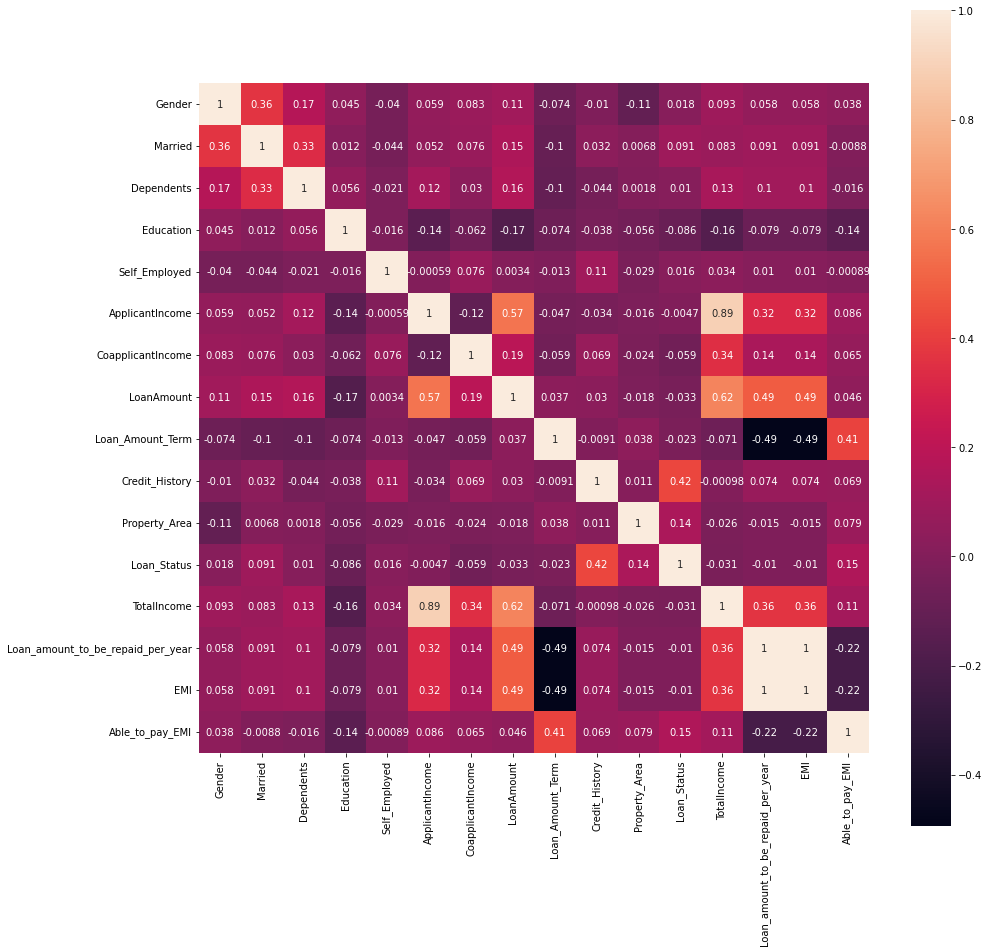

In [168]:
plt.figure(figsize=(15,15))
sns.heatmap(model_ready_data.corr(method="pearson"),square=True, annot=True)

<AxesSubplot:>

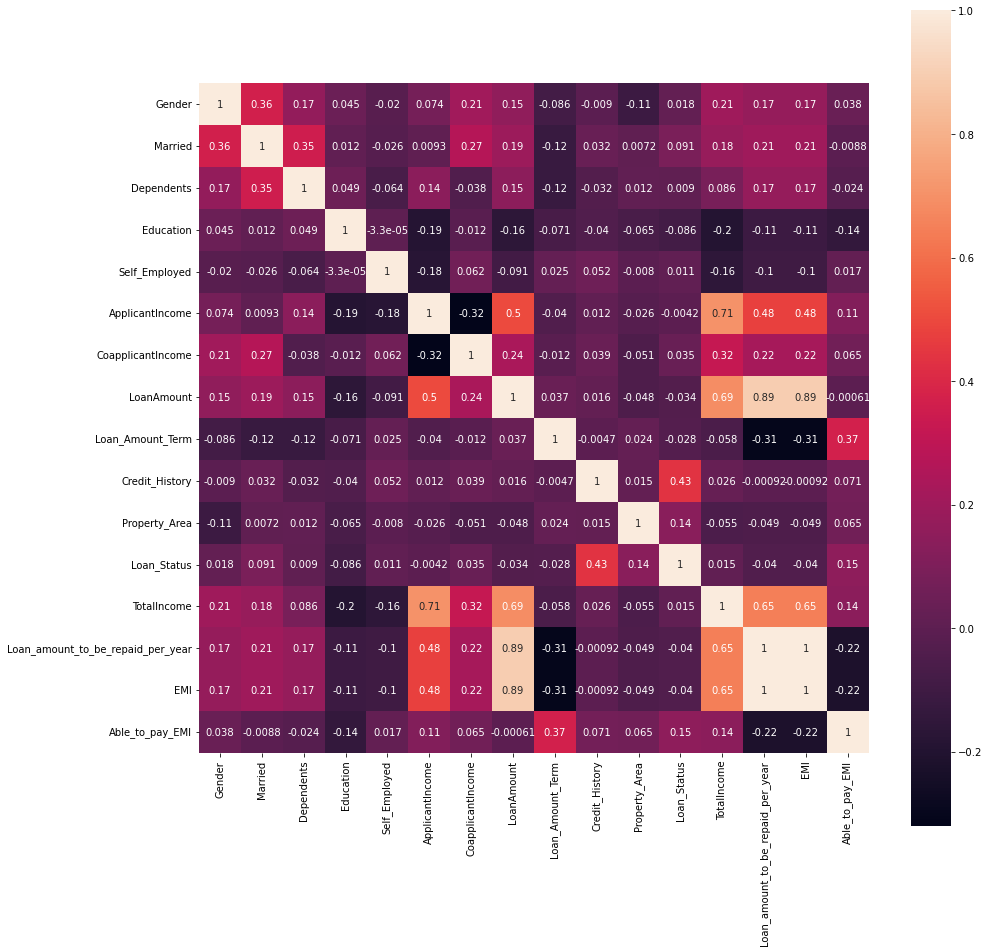

In [169]:
plt.figure(figsize=(15, 15))
sns.heatmap(model_ready_data.corr(method='spearman'), square=True,annot=True)

In [170]:
model_ready_data.corr(method='spearman')["Loan_Status"]

Gender                               0.017987
Married                              0.091478
Dependents                           0.008982
Education                           -0.085884
Self_Employed                        0.010901
ApplicantIncome                     -0.004162
CoapplicantIncome                    0.034960
LoanAmount                          -0.034176
Loan_Amount_Term                    -0.027664
Credit_History                       0.433329
Property_Area                        0.138710
Loan_Status                          1.000000
TotalIncome                          0.014875
Loan_amount_to_be_repaid_per_year   -0.040470
EMI                                 -0.040470
Able_to_pay_EMI                      0.149923
Name: Loan_Status, dtype: float64

In [171]:
data["Credit_History"].value_counts(),data["Loan_Status"].value_counts()

(1.0    475
 0.0     89
 2.0     50
 Name: Credit_History, dtype: int64,
 1    422
 0    192
 Name: Loan_Status, dtype: int64)

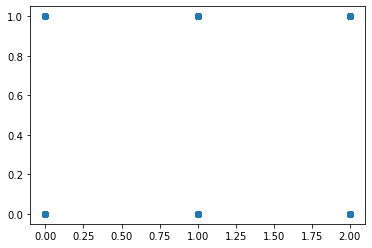

In [172]:
plt.scatter(data["Credit_History"],data["Loan_Status"])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

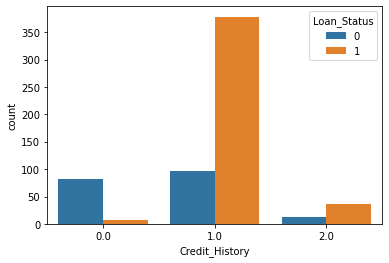

In [173]:
sns.countplot(data = data,
              x = "Credit_History",
              hue= "Loan_Status")

# Multiclass classification

-  In machine learning, multiclass or multinomial classification is the problem of classifying instances into one of three or more classes (classifying instances into one of two classes is called binary classification).


- While many classification algorithms (notably multinomial logistic regression) naturally permit the use of more than two classes, some are by nature binary algorithms; these can, however, be turned into multinomial classifiers by a variety of strategies.


- Multiclass classification should not be confused with multi-label classification, where multiple labels are to be predicted for each instance.

# Multi-label classification

- In machine learning, multi-label classification and the strongly related problem of multi-output classification are variants of the classification problem where multiple labels may be assigned to each instance.


- Multi-label classification is a generalization of multiclass classification, which is the single-label problem of categorizing instances into precisely one of more than two classes; in the multi-label problem there is no constraint on how many of the classes the instance can be assigned to.


- Formally, multi-label classification is the problem of finding a model that maps inputs x to binary vectors y; that is, it assigns a value of 0 or 1 for each element (label) Zin y.

https://en.wikipedia.org/wiki/Multiclass_classification

https://en.wikipedia.org/wiki/Multi-label_classification



# Column Standarization and Normalization


## Mean centering and Variance scaling (Stndard Scaling)


    - Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

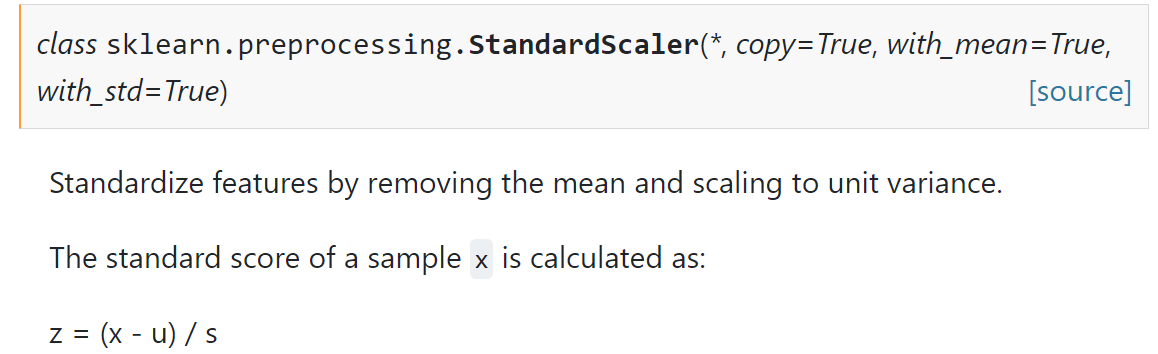




## MinMax Scaling


    - Transform features by scaling each feature to a given range.

    - This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

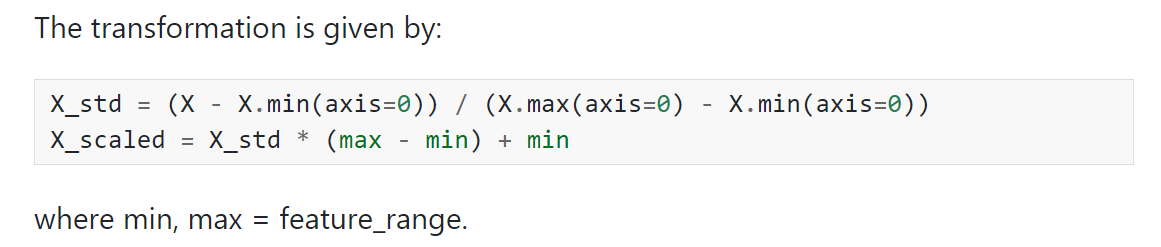


In [174]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
std_data = scaler.fit_transform(model_ready_data)
std_data = pd.DataFrame(std_data, columns=model_ready_data.columns)
std_data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_amount_to_be_repaid_per_year,EMI,Able_to_pay_EMI
0,0.472343,-1.372089,-0.737806,-0.528362,-0.174052,0.072991,-0.554487,-0.211241,0.273231,0.134703,-0.440191,0.674519,-0.182184,-0.212270,-0.212270,-2.381998
1,0.472343,0.728816,0.253470,-0.528362,-0.174052,-0.134412,-0.038732,-0.211241,0.273231,0.134703,-1.109162,-1.482537,-0.144684,-0.231329,-0.231329,0.419816
2,0.472343,0.728816,-0.737806,-0.528362,-0.586643,-0.393747,-0.554487,-0.948996,0.273231,0.134703,-0.440191,0.674519,-0.623656,-0.568956,-0.568956,0.419816
3,0.472343,0.728816,-0.737806,1.892641,-0.174052,-0.462062,0.251980,-0.306435,0.273231,0.134703,-0.440191,0.674519,-0.322885,-0.274894,-0.274894,0.419816
4,0.472343,-1.372089,-0.737806,-0.528362,-0.174052,0.097728,-0.554487,-0.056551,0.273231,0.134703,-0.440191,0.674519,-0.158785,-0.160537,-0.160537,0.419816
